<a href="https://colab.research.google.com/github/luanakwon/GroundTemperature/blob/main/GroundTemp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os


In [3]:
cols = ["YearMonthDayHourMinute","STN","Lon","Lat","isitu-LST","Band1","Band2","Band3","Band4","Band5","Band6","Band7","Band8","Band9","Band10","Band11","Band12","Band13","Band14","Band15","Band16","30daysBand3","30daysBand13","GK2A-LST","SolarZA","SateZA","ESR","Height","LandType","insitu-TA","insitu-HM","insitu-TD","insitu-TG","insitu-TED0.05","insitu-TED0.1","insitu-TED0.2","insitu-TED0.3","insitu-TED0.5","insitu-TED1.0","insitu-TED1.5","insitu-TED3.0","insitu-TED5.0","insitu-PA","insitu-PS"]
features = ["YearMonthDayHourMinute","STN","Lon","Lat",
           "Band1","Band2","Band3","Band4",
           "Band5","Band6","Band7","Band8",
           "Band9","Band10","Band11","Band12",
           "Band13","Band14","Band15","Band16",
           "30daysBand3","30daysBand13",
           "GK2A-LST","SolarZA","SateZA",
           "ESR",
           "LandType"]
targets = ["isitu-LST","insitu-TA"]

# Data Overview

In [ ]:
sample = pd.read_csv('20200101.LST.csv',header=0,names=cols)
sample.head()

,YearMonthDayHourMinute,STN,Lon,Lat,isitu-LST,Band1,Band2,Band3,Band4,Band5,...,insitu-TED0.1,insitu-TED0.2,insitu-TED0.3,insitu-TED0.5,insitu-TED1.0,insitu-TED1.5,insitu-TED3.0,insitu-TED5.0,insitu-PA,insitu-PS
0,202001010000,92,128.66670,38.06670,-999.0,-0.00057,0.00000,0.0003,-0.00030,0.0003,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
1,202001010000,93,127.75443,37.94738,-999.0,0.00000,0.00000,0.0003,0.00075,-0.0003,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
2,202001010000,95,127.30420,38.14787,-2.6,-0.00057,-0.00057,0.0003,-0.00060,-0.0003,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,1014.1,1034.6
3,202001010000,96,131.86983,37.23952,-999.0,0.00000,0.00000,0.0000,0.00105,0.0000,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
4,202001010000,98,127.06070,37.90188,-3.1,0.00000,0.00000,0.0003,0.00060,-0.0003,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,1019.6,1034.8


(104543, 44)
0.0 7.239350000000002
0.0 5.420450000000002


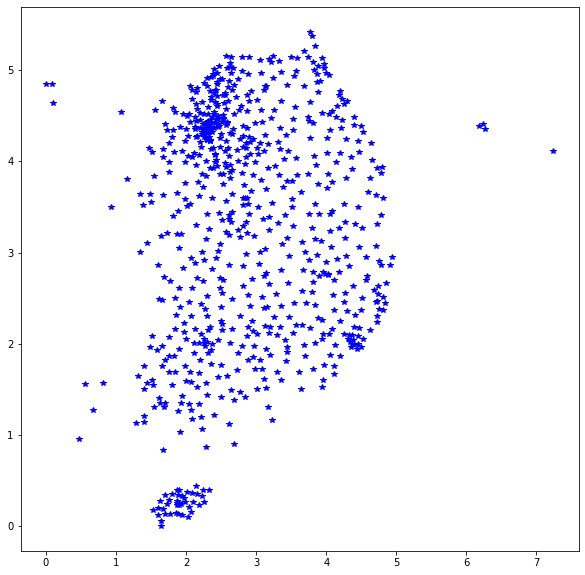

In [ ]:
print(sample.shape)
df = sample.iloc[:,1:4].drop_duplicates().to_numpy()
df[:,1:] -= [124.63048,33.12206]
print(min(df[:,1]),max(df[:,1]))
print(min(df[:,2]),max(df[:,2]))
plt.figure(figsize=(10,10))
plt.plot(df[:,1],df[:,2],'b*')
plt.show()

In [ ]:
for i in range(4,44):
  col = sample.loc[sample.iloc[:,i] > -999].iloc[:,i]
  if i == 28:
    print(f"{cols[i]} \t\tmin: {np.min(col)} \t\t\tmax: {np.max(col)} \t\t\tavg: {np.mean(col)} ")
  elif len(cols[i]) > 6:
    print(f"{cols[i]} \t\tmin: {np.min(col)} \t\tmax: {np.max(col)} \t\tavg: {np.mean(col)} ")
  else:
    print(f"{cols[i]} \t\t\tmin: {np.min(col)} \t\tmax: {np.max(col)} \t\tavg: {np.mean(col)} ")

isitu-LST 		min: -4.9 		max: 26.2 		avg: 0.27080945558739256 
Band1 			min: -0.00113 		max: 0.47359 		avg: 0.05738944055405184 
Band2 			min: -0.00114 		max: 0.48815 		avg: 0.054203694192665935 
Band3 			min: -0.00328 		max: 0.50395 		avg: 0.0484779530327403 
Band4 			min: -0.00254 		max: 0.5813 		avg: 0.059793412735871763 
Band5 			min: -0.00151 		max: 0.08579 		avg: 0.0038715424256143016 
Band6 			min: -0.00129 		max: 0.42633 		avg: 0.05491612221505149 
Band7 			min: 238.19384 		max: 308.08012 		avg: 271.8489144462853 
Band8 			min: 228.0943 		max: 245.40486 		avg: 238.82654382596303 
Band9 			min: 230.42801 		max: 254.45996 		avg: 248.05423254235814 
Band10 			min: 231.328 		max: 262.12081 		avg: 253.84858025438996 
Band11 			min: 233.6343 		max: 285.24053 		avg: 265.11799543090245 
Band12 			min: 229.78848 		max: 262.39371 		avg: 247.0980390755849 
Band13 			min: 234.30622 		max: 287.81421 		avg: 266.98636089782985 
Band14 			min: 233.11319 		max: 288.20345 		avg: 266.9280302948457

In [ ]:
df_LST = sample.loc[(sample['isitu-LST'] > -999)]
print(f"df size from {sample.shape} -> {df_LST.shape}")
df_TA = sample.loc[(sample['insitu-TA'] > -999)]
print(f"df size from {sample.shape} -> {df_TA.shape}")
df_LST_TA = sample.loc[(sample['isitu-LST'] > -999) | (sample['insitu-TA'] > -999)]
print(f"df size from {sample.shape} -> {df_LST_TA.shape}")

df size from (104543, 44) -> (13960, 44)
df size from (104543, 44) -> (13960, 44)
df size from (104543, 44) -> (13960, 44)


# Drop unlabeled data

In [ ]:
%%bash
STARTYEAR=2020
ENDYEAR=2021
for (( c=$STARTYEAR; c<=$ENDYEAR; c++ ))
do
  STARTMONTH=1
  ENDMONTH=12
  for (( d=$STARTMONTH; d<=$ENDMONTH; d++ ))
  do
    wget "https://bd.kma.go.kr/contest/resources/$c$(printf '%02d' $d).zip"
    unzip "/content/$c$(printf '%02d' $d).zip" -d "/content/data"
  done
done

In [ ]:
folderpath='data/'

for year in [2020]:
  for month in range(3,4):
    allmon = []
    for i in range(1,32):
      try:
        df = pd.read_csv(folderpath + '%d%02d%02d.LST.csv'%(year,month,i),names=cols)
      except FileNotFoundError:
        print('%d%02d%02d.LST.csv missing'%(year,month,i))
        continue
      # exclude testset
      if year==2021 and ((month==7 and 1<=i and i<=11) or (month==8 and 21<=i and i<=31)):
        continue

      len0 = df.shape[0]
      df = df.loc[(df['isitu-LST'] > -999) | (df['insitu-TA'] > -999)]
      len1 = df.shape[0]
      print(f"dropped {len0-len1}, concatenating {len1} from",'%d%02d%02d.LST.csv'%(year,month,i))
      allmon.append(df)
      
    if len(allmon) != 0:
      df_all = pd.concat(allmon)
      print('='*10 + ' %d%02d done '%(year,month) + '='*10 + f'  {df_all.shape}')
      df_all.to_csv('%d%02d.LST.csv'%(year,month),header=False, index=False)

# Gather test data

In [ ]:
%%bash
YEAR=2021
STARTMONTH=7
ENDMONTH=8
for (( d=$STARTMONTH; d<=$ENDMONTH; d++ ))
do
  wget "https://bd.kma.go.kr/contest/resources/$YEAR$(printf '%02d' $d).zip"
  unzip "/content/$YEAR$(printf '%02d' $d).zip" -d "/content/data"
done

In [ ]:
df = pd.read_csv('data/202107/20210701.LST.csv')
df.dtypes

In [ ]:
testsetcols = cols[:]
testsetcols.remove('isitu-LST')
testsetcols.remove('insitu-TA')
print(len(testsetcols))
testdays = {7:(1,11), 8:(21,31)}
folderpath = '/content/data/'
dfList = []
for month in [7, 8]:
  day0, day1 = testdays[month]
  for day in range(day0,day1+1):
    df = pd.read_csv(folderpath+'2021%02d/2021%02d%02d.LST.csv'%(month,month,day), usecols=testsetcols)
    dfList.append(df)
    print(f'appended {df.shape[0]}rows from '+'2021%02d/2021%02d%02d.LST.csv'%(month,month,day))
df_all = pd.concat(dfList)
print(f'{df_all.shape[0]} rows concatenated')

df_all.to_csv('test.LST.csv', index=False)
print('test.LST.csv saved')

In [ ]:
print(df_all.shape)

(54503, 27)


# Training

## prepare train data

In [4]:
!gdown 1-EMhXFZJhzG7km6m75MoM3lsAVDpKji3 -O train10M.csv

Downloading...
From: https://drive.google.com/uc?id=1-EMhXFZJhzG7km6m75MoM3lsAVDpKji3
To: /content/train10M.csv
100% 3.51G/3.51G [00:29<00:00, 119MB/s]


In [5]:
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error # idk but xgb cannot recognize this
import joblib



In [6]:
RANDOM_STATE = 31415
target = targets[:1] # isitu-LST
timecol = features[:1] # time column
# featureInUse = features[1:] # excluding time column
featureInUse = features[1:] + cols[cols.index('insitu-TA')+1:]

# sample fraction of train data
fraction = 0.2 # 0.0 ~ 1.0

In [7]:
df = pd.read_csv(f'/content/train10M.csv',usecols=timecol+featureInUse+targets)
print(df.shape)

(10583013, 43)


In [8]:
X_train, X_val, Y_train_all, Y_val_all = train_test_split(
    df.loc[:,timecol+featureInUse],df.loc[:,targets], test_size=0.2*fraction, train_size=0.8*fraction, 
    random_state=RANDOM_STATE, shuffle=True, stratify=None)
print(f"{X_train.shape[0]} train values, {X_val.shape[0]} test values out of {df.shape[0]} values")
print(X_train.shape)
print(X_val.shape)
print(Y_train_all.shape)
print(Y_val_all.shape)

1693282 train values, 423321 test values out of 10583013 values
(1693282, 41)
(423321, 41)
(1693282, 2)
(423321, 2)


In [9]:
# Trying to split YMDH to 4 different columns
for df_subset in [X_train, X_val]:
  YMDH = pd.to_datetime(df_subset[timecol[0]])
  df_subset.insert(0,'Hour',YMDH.dt.hour)
  df_subset.insert(0,'Day',YMDH.dt.day)
  df_subset.insert(0,'Month',YMDH.dt.month)
  df_subset.insert(0,'Year',YMDH.dt.year)
  df_subset.drop(columns=timecol[0], inplace=True)

# split labels into LST & TA
Y_train_LST = Y_train_all.loc[:,targets[:1]]
Y_train_TA = Y_train_all.loc[:,targets[1:]]
Y_val_LST = Y_val_all.loc[:,targets[:1]]
Y_val_TA = Y_val_all.loc[:,targets[1:]]

# check shapes
for df_subset in [X_train, X_val, Y_train_LST, Y_train_TA, Y_val_LST, Y_val_TA]:
  print(df_subset.shape)

(1693282, 44)
(423321, 44)
(1693282, 1)
(1693282, 1)
(423321, 1)
(423321, 1)


**WARNING! training all 3 models at the same time will require LARGE amount of memory**

## Random Forest Regressor

In [ ]:
RFR_model = RandomForestRegressor(
    n_estimators=100,
    criterion='squared_error', 
    max_depth=None, 
    min_samples_split=2, 
    min_samples_leaf=1, 
    min_weight_fraction_leaf=0.0, 
    max_features=0.8, 
    max_leaf_nodes=None, 
    min_impurity_decrease=0.0, 
    bootstrap=True, 
    oob_score=False, 
    n_jobs=None, 
    random_state=RANDOM_STATE, 
    verbose=1, 
    warm_start=False, 
    ccp_alpha=0.0, 
    max_samples=None
)

In [ ]:
RFR_model.fit(X_train, Y_train.values.ravel())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 16.5min finished


RandomForestRegressor(max_features=0.8, random_state=31415, verbose=1)

In [ ]:
prediction = RFR_model.predict(X_val)
diff = prediction - Y_val.values.ravel()
loss = np.sqrt(np.mean(diff**2))
print(f'RMSE loss {loss}')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


RMSE loss 3.2255467722117004


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    8.1s finished


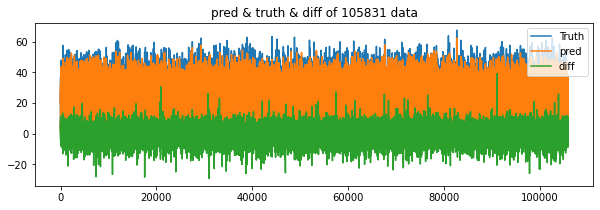

In [ ]:
plt.figure(figsize=(10,3))
plt.title(f'pred & truth & diff of {X_val.shape[0]} data')
plt.plot(Y_val.values.ravel(), label='Truth')
plt.plot(prediction,label='pred')
plt.plot(diff,label='diff')
plt.legend()
plt.show()

In [ ]:
# save model
joblib.dump(RFR_model, f'RFR_{fraction}') 

['RFR_202001']

## Gradient Boosting Regressor

In [ ]:
GBR_model = GradientBoostingRegressor(
    loss='squared_error', 
    learning_rate=0.1, 
    n_estimators=200, 
    subsample=1.0, 
    criterion='friedman_mse', 
    min_samples_split=2, 
    min_samples_leaf=1, 
    min_weight_fraction_leaf=0.0, 
    max_depth=3, 
    min_impurity_decrease=0.0, 
    init=None, 
    random_state=RANDOM_STATE, 
    max_features=None, 
    alpha=0.9, # only for huber loss or quantile loss
    verbose=1, 
    max_leaf_nodes=None, 
    warm_start=False, # resume from previous fit
    validation_fraction=0.1, 
    n_iter_no_change=30, # n of iters with no improvement
    tol=0.0001, 
    ccp_alpha=0.0
)

In [ ]:
GBR_model.fit(X_train,Y_train.values.ravel())

      Iter       Train Loss   Remaining Time 
         1         115.6347            2.16m
         2          99.8568            1.94m
         3          86.8791            1.87m
         4          76.3430            1.82m
         5          67.6314            1.80m
         6          60.5036            1.78m
         7          54.4496            1.77m
         8          49.4818            1.75m
         9          45.4581            1.74m
        10          42.0050            1.73m
        20          27.4036            1.63m
        30          23.1016            1.52m
        40          20.8544            1.42m
        50          19.3543            1.33m
        60          18.4296            1.23m
        70          17.7658            1.14m
        80          17.2512            1.06m
        90          16.8288           57.95s
       100          16.4358           52.60s
       200          14.3885            0.00s


GradientBoostingRegressor(n_estimators=200, n_iter_no_change=30,
                          random_state=31415, verbose=1)

In [ ]:
prediction = GBR_model.predict(X_val)
diff = prediction - Y_val.values.ravel()
loss = np.sqrt(np.mean(diff**2))
print(f'RMSE loss {loss}')

RMSE loss 3.9008046385672372


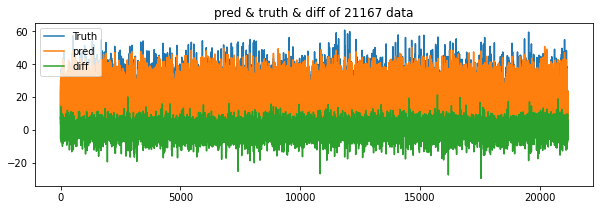

In [ ]:
plt.figure(figsize=(10,3))
plt.title(f'pred & truth & diff of {X_val.shape[0]} data')
plt.plot(Y_val.values.ravel(), label='Truth')
plt.plot(prediction,label='pred')
plt.plot(diff,label='diff')
plt.legend()
plt.show()

In [ ]:
# save model
joblib.dump(GBR_model, f'GBR_{fraction}') 

## Adaboost Regressor

In [ ]:
AR_model = AdaBoostRegressor(
    base_estimator=None,
    n_estimators=50, 
    learning_rate=1.0, 
    loss='square', 
    random_state=RANDOM_STATE
)

In [ ]:
AR_model.fit(X_train,Y_train.values.ravel())

AdaBoostRegressor(loss='square', random_state=31415)

In [ ]:
prediction = AR_model.predict(X_val)
diff = prediction - Y_val.values.ravel()
loss = np.sqrt(np.mean(diff**2))
print(f'RMSE loss {loss}')

RMSE loss 6.375204286914479


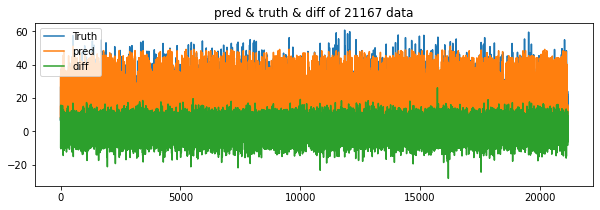

In [ ]:
plt.figure(figsize=(10,3))
plt.title(f'pred & truth & diff of {X_val.shape[0]} data')
plt.plot(Y_val.values.ravel(), label='Truth')
plt.plot(prediction,label='pred')
plt.plot(diff,label='diff')
plt.legend()
plt.show()

In [ ]:
# save model
joblib.dump(GBR_model, f'AR_{fraction}') 

## XGBoost

In [ ]:
import xgboost as xgb

### isitu-LST learning

In [ ]:
XGBR_model = xgb.XGBRegressor(
    max_depth=3, 
    learning_rate=0.1, 
    n_estimators=1700, 
    verbosity=0, 
    silent=None, 
    objective="reg:squarederror", 
    booster='gbtree', 
    n_jobs=1, 
    nthread=None, 
    gamma=0, 
    min_child_weight=1, 
    max_delta_step=0, 
    subsample=0.8, 
    colsample_bytree=1, 
    colsample_bylevel=1, 
    colsample_bynode=1, 
    reg_alpha=0, 
    reg_lambda=1, 
    scale_pos_weight=1, 
    base_score=0.5, 
    random_state=RANDOM_STATE, 
    missing=None, 
    importance_type="gain",
    early_stopping_rounds=30,
    predictor='cpu_predictor'
)

In [ ]:
XGBR_model.fit(X_train,Y_train,eval_set=[(X_train,Y_train),(X_val,Y_val)])

RMSE = 3.250522


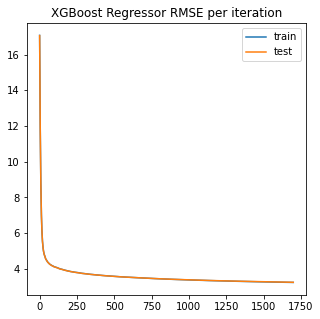

In [ ]:
results = XGBR_model.evals_result()
print(f"RMSE = {results['validation_1']['rmse'][-1]}")
plt.figure(figsize=(5,5))
plt.title('XGBoost Regressor RMSE per iteration')
plt.plot(results['validation_0']['rmse'], label='train')
plt.plot(results['validation_1']['rmse'], label='val')
plt.legend()
plt.show()

RMSE = 3.250522


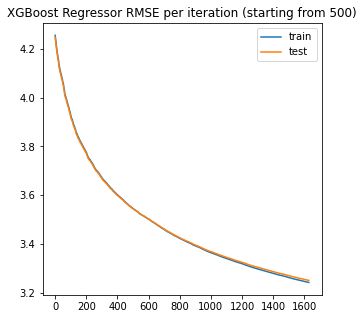

In [ ]:
print(f"RMSE = {results['validation_1']['rmse'][-1]}")
plt.figure(figsize=(5,5))
plt.title('XGBoost Regressor RMSE per iteration (starting from 70)')
plt.plot(results['validation_0']['rmse'][70:], label='train')
plt.plot(results['validation_1']['rmse'][70:], label='val')
plt.legend()
plt.show()

In [ ]:
prediction = XGBR_model.predict(X_val)
diff = prediction - Y_val.values.ravel()
loss = np.sqrt(np.mean(diff**2))
print(f'RMSE loss {loss}')

RMSE loss 3.251054522610311


/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


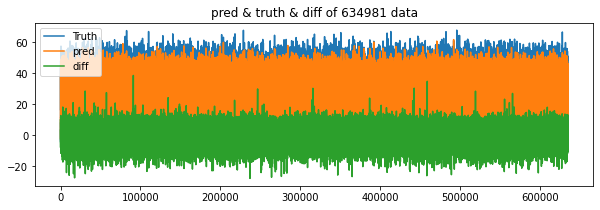

In [ ]:
plt.figure(figsize=(10,3))
plt.title(f'pred & truth & diff of {X_val.shape[0]} data')
plt.plot(Y_val.values.ravel(), label='Truth')
plt.plot(prediction,label='pred')
plt.plot(diff,label='diff')
plt.legend()
plt.show()

### insitu-TA learning

In [ ]:
XGBR_model = xgb.XGBRegressor(
    max_depth=3, 
    learning_rate=0.1, 
    n_estimators=1000, 
    verbosity=0, 
    silent=None, 
    objective="reg:squarederror", 
    booster='gbtree', 
    subsample=0.8, 
    random_state=RANDOM_STATE, 
    early_stopping_rounds=30,
    predictor='cpu_predictor'
)

In [ ]:
XGBR_model.fit(X_train,Y_train_TA,eval_set=[(X_train,Y_train_TA),(X_val,Y_val_TA)])

RMSE = 20.981844


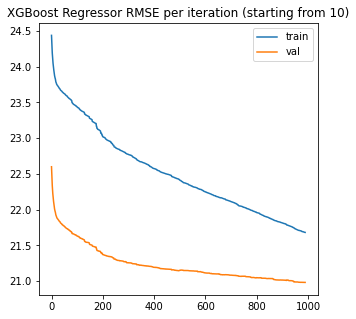

In [ ]:
results = XGBR_model.evals_result()
cut_front = 10
print(f"RMSE = {results['validation_1']['rmse'][-1]}")
plt.figure(figsize=(5,5))
plt.title(f'XGBoost Regressor RMSE per iteration (starting from {cut_front})')
plt.plot(results['validation_0']['rmse'][cut_front:], label='train')
plt.plot(results['validation_1']['rmse'][cut_front:], label='val')
plt.legend()
plt.show()

In [ ]:
prediction = XGBR_model.predict(X_val)
diff = prediction - Y_val_TA.values.ravel()
loss = np.sqrt(np.mean(diff**2))
print(f'RMSE loss {loss}')

RMSE loss 20.9875680563548


# useless attempts

## attempt 1

In [ ]:
# plot train score and validation score at each given n_estimators
# score = rmse
train_loss = []
test_loss = []
for n_estimators in [100,500,1000,2000]:
  XGBR_model.n_estimators = n_estimators
  XGBR_model.fit(X_train,Y_train)
  # get train loss
  predt = XGBR_model.predict(X_train)
  diff = predt - Y_train.values.ravel()
  train_loss.append(np.sqrt(np.mean(diff**2)))
  print(f'\rn_estimators {n_estimators} train loss {train_loss[-1]}', end='\t')
  # get test loss
  predt = XGBR_model.predict(X_val)
  diff = predt - Y_val.values.ravel()
  test_loss.append(np.sqrt(np.mean(diff**2)))
  print(f'test loss {test_loss[-1]}',end='\t\t\t')


plt.figure(figsize=(5,5))
plt.title('loss per n_estimators in XGBR')
plt.plot(train_loss,label='train rmse')
plt.plot(test_loss,label='test rmse')
plt.legend()
plt.show()

In [ ]:
XGBR_model.save_model('XGBR0627.txt')

In [ ]:
mm = xgb.XGBRegressor()
mm.load_model('XGBR0627.txt')
pred2 = mm.predict(X_val)
print(np.sum(pred2-prediction))

0.0


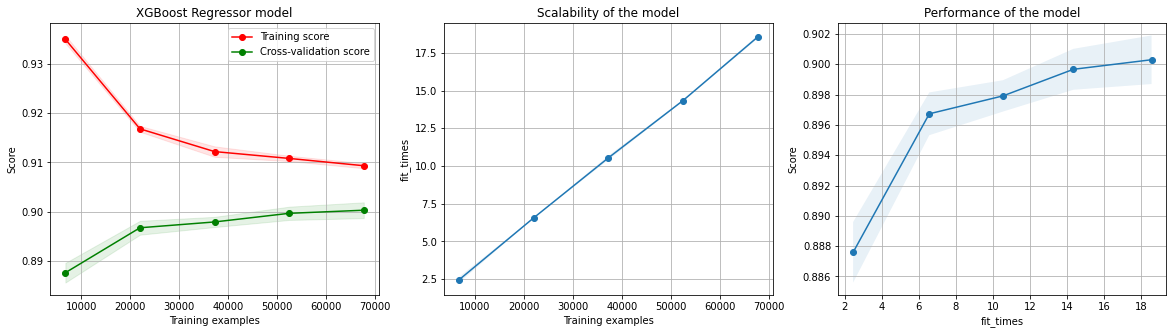

In [ ]:
import LearningCurvePlotter
from LearningCurvePlotter import plot_learning_curve

plt = plot_learning_curve(
    XGBR_model,
    'XGBoost Regressor model',
    X_train,
    Y_train,
    cv=3
)
plt.show()

## attempt 2 (python xgboost (not sklearn api))

In [10]:
# import xgb
import xgboost as xgb

### Predicting LST

In [11]:
# setting params for LST prediction
# https://xgboost.readthedocs.io/en/stable/parameter.html
param_LST = {
    'max_depth': 3, 
    'eta': 0.1, 
    'subsample': 0.5, 
    'predictor':'cpu_predictor', 
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'seed':RANDOM_STATE 
} 
dtrain_LST = xgb.DMatrix(X_train,label=Y_train_LST)
dval_LST = xgb.DMatrix(X_val,label=Y_val_LST)
evallist_LST = [(dtrain_LST,'train'),(dval_LST,'eval')]

In [12]:
# evals result
evals_LST = {}
# train LST
model_LST = xgb.train(
    param_LST,
    dtrain_LST,
    num_boost_round=200,
    evals=evallist_LST,
    early_stopping_rounds=10,
    verbose_eval=20,
    evals_result = evals_LST
)

[0]	train-rmse:17.0016	eval-rmse:16.965
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 10 rounds.
[20]	train-rmse:3.79946	eval-rmse:3.77989
[40]	train-rmse:2.86205	eval-rmse:2.85338
[60]	train-rmse:2.69153	eval-rmse:2.68381
[80]	train-rmse:2.6017	eval-rmse:2.5941
[100]	train-rmse:2.53416	eval-rmse:2.52698
[120]	train-rmse:2.48536	eval-rmse:2.47837
[140]	train-rmse:2.43972	eval-rmse:2.43285
[160]	train-rmse:2.40718	eval-rmse:2.40078
[180]	train-rmse:2.37235	eval-rmse:2.3667
[199]	train-rmse:2.34509	eval-rmse:2.33945


eval-RMSE = 2.339451


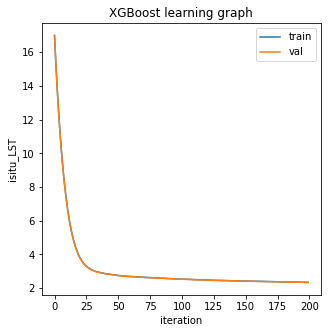

In [13]:
results = evals_LST
print(f"eval-RMSE = {results['eval']['rmse'][-1]}")

plt.figure(figsize=(5,5))
plt.title('XGBoost learning graph')
plt.ylabel('isitu_LST')
plt.xlabel('iteration')
plt.plot(results['train']['rmse'], label='train')
plt.plot(results['eval']['rmse'], label='val')
plt.legend()
plt.show()

In [14]:
model_LST.save_model('XGB_LST_0720')

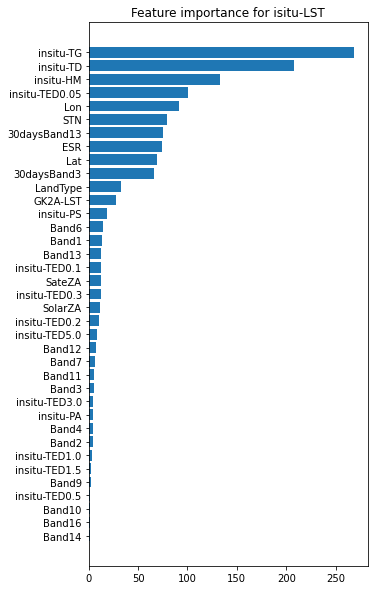

In [15]:
df_fs = pd.DataFrame.from_dict(model_LST.get_fscore(),orient='index')
df_fs = df_fs.sort_values(0,ascending=True)

y = np.arange(len(df_fs))
labels = df_fs.index
values = df_fs.iloc[:,0]

plt.figure(figsize=(5,10))
plt.title('Feature importance for isitu-LST')
plt.barh(y, values)
plt.yticks(y, labels)
plt.show()

### Predicting TA

In [16]:
# setting params for LST prediction
# https://xgboost.readthedocs.io/en/stable/parameter.html
param_TA = {
    'max_depth': 2, 
    'eta': 0.1, 
    'subsample': 0.5, 
    'predictor':'cpu_predictor', 
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'seed':RANDOM_STATE 
} 

dtrain_TA = xgb.DMatrix(X_train,label=Y_train_TA)
dval_TA = xgb.DMatrix(X_val,label=Y_val_TA)
evallist_TA = [(dtrain_TA,'train'),(dval_TA,'eval')]

In [17]:
# evals result
evals_TA = {}
# train TA
model_TA = xgb.train(
    param_TA,
    dtrain_TA,
    num_boost_round=300,
    evals=evallist_TA,
    early_stopping_rounds=10,
    verbose_eval=20,
    evals_result = evals_TA
)

[0]	train-rmse:25.4536	eval-rmse:24.829
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 10 rounds.
[20]	train-rmse:8.44093	eval-rmse:8.06128
[40]	train-rmse:6.94593	eval-rmse:6.61425
[60]	train-rmse:6.35767	eval-rmse:6.06306
[80]	train-rmse:5.98843	eval-rmse:5.70436
[100]	train-rmse:5.58288	eval-rmse:5.3757
[120]	train-rmse:5.29348	eval-rmse:5.1492
[140]	train-rmse:4.88376	eval-rmse:4.81434
[160]	train-rmse:4.58231	eval-rmse:4.57395
[180]	train-rmse:4.33862	eval-rmse:4.37338
[200]	train-rmse:4.10786	eval-rmse:4.2459
[220]	train-rmse:3.90252	eval-rmse:4.09366
[240]	train-rmse:3.71266	eval-rmse:4.00794
[260]	train-rmse:3.55962	eval-rmse:3.9182
[280]	train-rmse:3.43661	eval-rmse:3.83827
[299]	train-rmse:3.27825	eval-rmse:3.73737


eval-RMSE = 3.737372


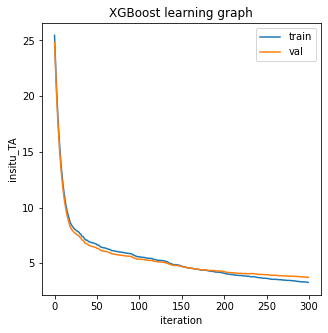

In [18]:
results = evals_TA
print(f"eval-RMSE = {results['eval']['rmse'][-1]}")

plt.figure(figsize=(5,5))
plt.title('XGBoost learning graph')
plt.ylabel('insitu_TA')
plt.xlabel('iteration')
plt.plot(results['train']['rmse'], label='train')
plt.plot(results['eval']['rmse'], label='val')
plt.legend()
plt.show()

In [19]:
model_TA.save_model('XGB_TA_0720')

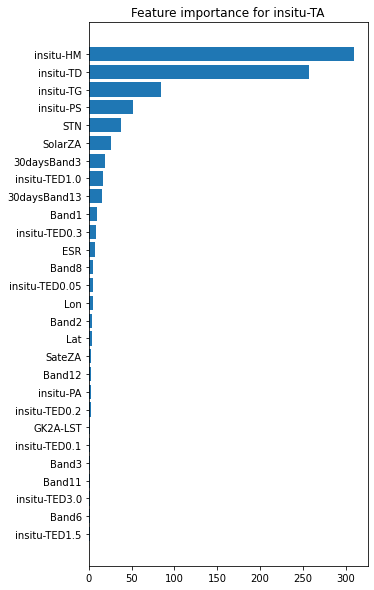

In [20]:
df_fs = pd.DataFrame.from_dict(model_TA.get_fscore(),orient='index')
df_fs = df_fs.sort_values(0,ascending=True)

y = np.arange(len(df_fs))
labels = df_fs.index
values = df_fs.iloc[:,0]

plt.figure(figsize=(5,10))
plt.title('Feature importance for insitu-TA')
plt.barh(y, values)
plt.yticks(y, labels)
plt.show()

# submission

In [21]:
!gdown 1xgucvJDFvw1MTY1xPg3K00mBKPJbjGlF -O TestFeatures.csv

Downloading...
From: https://drive.google.com/uc?id=1xgucvJDFvw1MTY1xPg3K00mBKPJbjGlF
To: /content/TestFeatures.csv
100% 17.7M/17.7M [00:00<00:00, 18.2MB/s]


In [ ]:
!wget https://bd.kma.go.kr/contest/resources/1-2_%EA%B2%80%EC%A6%9D%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%85%8B.csv 
!mv 1-2_*.csv submissionFormat.csv

--2022-07-10 11:23:31--  https://bd.kma.go.kr/contest/resources/1-2_%EA%B2%80%EC%A6%9D%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%85%8B.csv
Resolving bd.kma.go.kr (bd.kma.go.kr)... 203.247.90.20
Connecting to bd.kma.go.kr (bd.kma.go.kr)|203.247.90.20|:443... connected.
HTTP request sent, awaiting response... 503 Service Unavailable
2022-07-10 11:23:58 ERROR 503: Service Unavailable.

mv: cannot stat '1-2_*.csv': No such file or directory


In [35]:
submissionFormat = pd.read_csv('submissionFormat.csv',usecols=["YearMonthDayHourMinute","STN"])
submissionFormat.shape

(54503, 2)

In [28]:
X_test = pd.read_csv('TestFeatures.csv',usecols=timecol+featureInUse)
X_test_unique = X_test.loc[:,["YearMonthDayHourMinute","STN"]]
# Split YMDH to 4 different columns
YMDH = pd.to_datetime(X_test["YearMonthDayHourMinute"])
X_test.insert(0,'Hour',YMDH.dt.hour)
X_test.insert(0,'Day',YMDH.dt.day)
X_test.insert(0,'Month',YMDH.dt.month)
X_test.insert(0,'Year',YMDH.dt.year)
X_test.drop(columns=timecol[0], inplace=True)
print(X_test.shape)
# To DMatrix
dX_test = xgb.DMatrix(X_test)

(54503, 44)


In [29]:
mm = xgb.Booster(params=param_LST, model_file='XGB_LST_0720')
pred = mm.predict(dX_test)
X_test_unique['isitu-LST'] = pred.reshape((-1,1))
print(X_test_unique.shape)

(54503, 3)


In [30]:
# mm = xgb.XGBRegressor()
# mm.load_model('XGBR0627.txt')
# pred = mm.predict(X_test)
# X_test_unique['isitu-LST'] = pred.reshape(-1,1)
# print(X_test_unique.shape)

In [31]:
mm2 = xgb.Booster(params=param_TA, model_file='XGB_TA_0720')
pred = mm2.predict(dX_test)
X_test_unique['insitu-TA'] = pred.reshape((-1,1))
print(X_test_unique.shape)

(54503, 4)


In [ ]:
# mm2 = XGBR_model
# pred = mm2.predict(X_test)
# X_test_unique['insitu_TA'] = pred.reshape((-1,1))
# print(X_test_unique.shape)

(54503, 4)


In [36]:
submissionFormat = submissionFormat.merge(X_test_unique,on=["YearMonthDayHourMinute","STN"])
submissionFormat

,YearMonthDayHourMinute,STN,isitu-LST,insitu-TA
0,202107010030,90,21.655268,20.984735
1,202107010030,93,20.981083,19.961901
2,202107010030,95,19.574638,18.517242
3,202107010030,98,20.268087,19.669956
4,202107010030,99,20.786110,19.669956
...,...,...,...,...
54498,202108312330,973,25.130190,24.713223
54499,202108312330,974,23.317015,23.843302
54500,202108312330,977,22.963396,21.647400
54501,202108312330,978,18.909449,17.927742


In [37]:
# save submission
import datetime
UTC = datetime.datetime.now()
UTC2KST = datetime. timedelta(hours=9)
KST = UTC + UTC2KST

# submission file name should be "접수번호6자리.csv"
submissionFormat.to_csv(
    'submission%02d%02d.csv'%(KST.month,KST.day),
    index=False
)